# Welcome to Tapy

<img src="pics/TaPy_logo.png"  width="250" height="250"/>

## Let's fire up 

Eventually you can hack the functions.py in order to tune or create functionts that suit your purpose better  

In [4]:
%matplotlib inline
from functions import read_data,cropped,createIm,normalization,saveIm,binning,oscillation,createIm_fft
import glob,os
import numpy as np
from astropy.io import fits as pyfits
%pwd

u'C:\\Users\\oin67168\\Desktop\\TaPy-0.1'

# binning an summing

## Running average parameters

In [2]:
run_avg_size = 150  # How many images should be put together
run_avg_step = 150  # Stepsize for running average

In [3]:
%%time
def g0positionRawToF(pathFolder,run_avg_size=150,run_avg_step=50,):
    IM_folder_list = glob.glob(pathFolder+'\\*\\')
    sorted(IM_folder_list)
    
    print(len(glob.glob(IM_folder_list[0]+'*.fits')))
    
    chunW = []
    forRange = range(0,len(glob.glob(IM_folder_list[0]+'*.fits'))-1-run_avg_size,run_avg_step)
    for waveChunk in forRange:
        print(waveChunk)
        im_stack = []
        ob_stack = []
        
        for g0 in IM_folder_list:
#             im
            listatG0 = sorted(glob.glob(g0+'*.fits'))
            listatG0 = listatG0[waveChunk:waveChunk+run_avg_size]
            print('G0 = 0.'+g0.split('0.')[1].split('\\')[0].ljust(2,'0'),len(listatG0),waveChunk,waveChunk+run_avg_size)
            readed = [pyfits.open(image,ignore_missing_end=True)[0].data for image in listatG0 if not image.endswith('SummedImg')]
            readed = np.sum(np.asarray(readed),axis=0)
            print(np.shape(readed))
            print(10*'-')
            
            im_stack.append(readed)
            
#             OB


        print(10*'*')
        print(len(im_stack))
        print(10*'*')
        print(10*'*')
        
        

            

g0positionRawToF('C:\\Users\\imat\\Desktop\\PSI_ToF_nGI\\009_OB_optimized')
    
    

5961
0
('G0 = 0.00', 150, 0, 150)
(512L, 512L)
----------
('G0 = 0.04', 150, 0, 150)
(512L, 512L)
----------
('G0 = 0.08', 150, 0, 150)


KeyboardInterrupt: 

## Data folders
Open Beam data path:

In [2]:
path_ob = 'data/data_OB'

Sample data path:

In [3]:
path_im = 'data/data_smp'

Dark current data path:

In [4]:
path_dc = 'data/DCs'

## Setting parameters
Binning:

In [5]:
bin_fac = None

ROI for normalization:

In [6]:
norm_param = [3,5,20,40]

ROI for cropping:

In [7]:
crop_param = [10,15,80,60]

ROI for pixels intensity oscillation as a function of the step:

In [8]:
oscillationParam = [30,1,1,1]

Number of periods in the phase scan:

In [9]:
numberPeriods = 1

## Data processing
Loading:

In [10]:
im,ob = read_data(path_im,path_ob,path_dc)


Normalizing:

In [11]:
#im,ob=normalization(im,ob,*norm_param)

Oscillation:

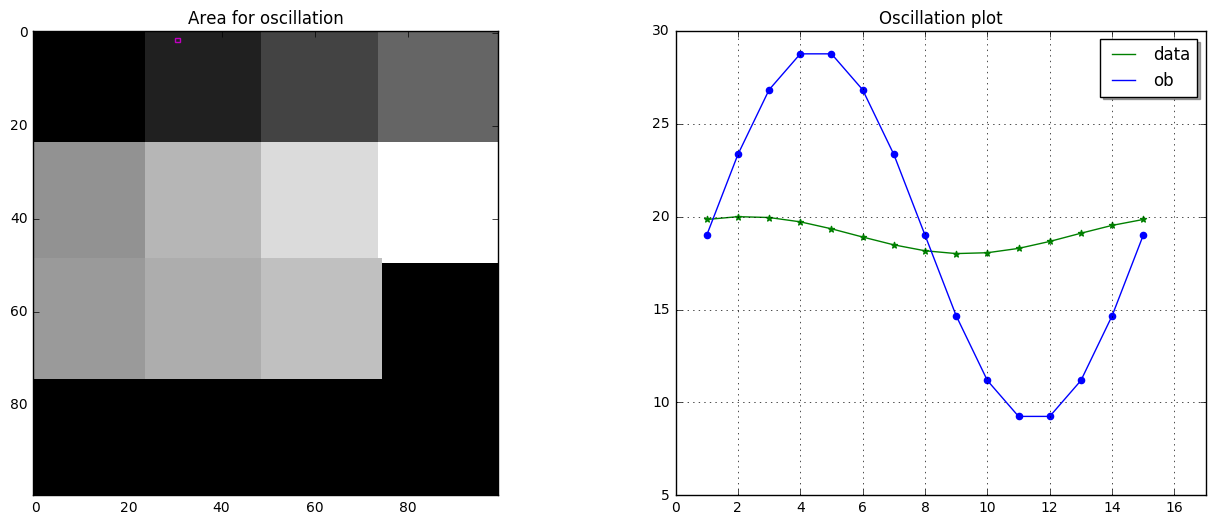

In [12]:
oscillation(im,ob,*oscillationParam,repeatedPeriod=False)

Cropping:

(100, 100)
25.9370803833 16.9146957397


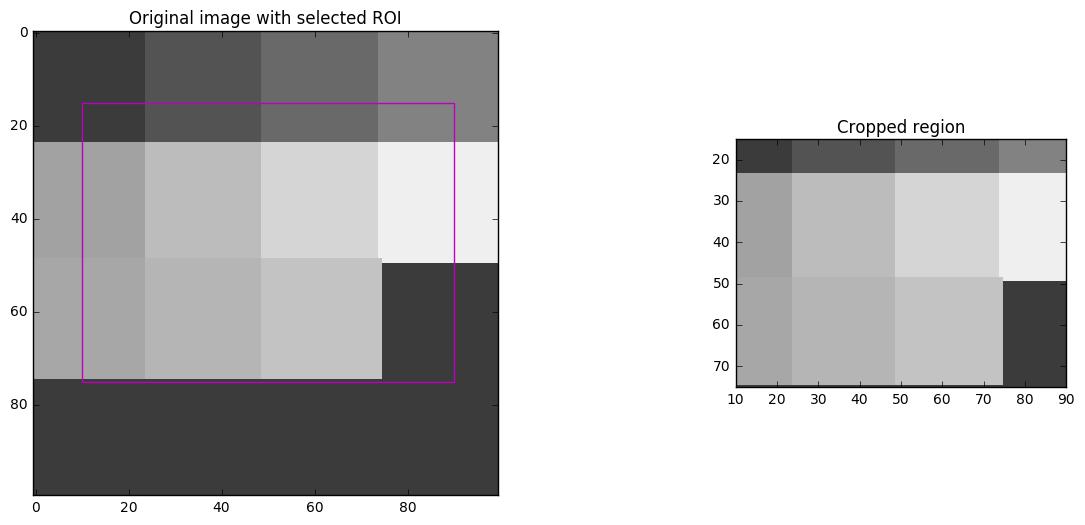

In [13]:
im,ob = cropped(im,ob,*crop_param)

Binning:

In [14]:
im, ob = binning(im,ob,bin_fac)

Creating:

In [15]:
ti, dpci, dfi, vis_map = createIm(im,ob,numberPeriods)

## Saving the images

In [16]:
saveIm(ti, dpci, dfi, vis_map,name='period2',folder='folder',overWrite=True)

files saved in folder:  folder
